In [113]:
from scipy import special
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [114]:
def y_case1(t, a, b):
    return a*t + b

def y_case2(t, a, b):
    return a*np.cos(t) + b*np.sin(t)

def y_case3(t, a, b):
    return a*np.exp(t) + b*np.exp(-t)

In [115]:
def x_case1(t, a, b, c):
    x1 = np.sqrt(1 - a**2) * t + c
    x2 = -np.sqrt(1 - a**2) * t + c
    return x1, x2

def x_case2(t, a, b, c):
    m1 = np.sqrt((a**2 - b**2) * np.cos(2*t) - a**2 + 2*a*b*np.sin(2*t) - b**2 + 2)
    m2 = (a**2 - b**2)*np.sin(2*t) - 2*a*b*np.cos(2*t)
    eval = (b**2 - a**2)*np.cos(2*t) - 2*a*b*np.sin(2*t) + (a**2 + b**2)
    eval = np.arcsin(np.sqrt(eval / (a**2 + b**2)) / np.sqrt(2))
    m3 = special.ellipeinc(eval, a**2 + b**2)
    m = m1 * m2 * m3
    n1 = (a**2 - b**2)*np.sin(2*t) - 2*a*b*np.cos(2*t)
    n2 = np.sqrt((a**2 - b**2)*np.cos(2*t) - (a**2 + b**2 - 2 - 2*a*b*np.sin(2*t)))
    n = n1 * n2
    return m / n + c, -(m / n) + c

def x_case2_series(t, a, b, c):
    c2 = a * b * np.sqrt(1 - b**2) / (2 * b**2 - 2) * t**2
    c1 = np.sqrt(1 - b**2) * t
    c0 = c
    return c2 + c1 + c0, -(c2 + c1) + c0

def x_case3_series(t, a, b, c):
    c2 = (a**2 - b**2) * np.sqrt(1 - (a - b)**2) / (2*(1 - (a - b)**2)) * t**2
    c1 = np.sqrt(1 - (a - b)**2) * t
    c0 = c
    return c2 + c1 + c0, -(c2 + c1) + c0

In [116]:
def surface(a, b, c, t, s, x_caseFunc, y_caseFunc):
    x1, x2 = x_caseFunc(t, a, b, c)
    y = y_caseFunc(t, a, b) * np.cos(s)
    z = y_caseFunc(t, a, b) * np.sin(s)
    return x1, x2, y, z

In [117]:
tmax = np.pi
num = 40
T = np.linspace(0, tmax, num)
S = np.linspace(0, 2*np.pi, num)
T, S = np.meshgrid(T, S)
Cx = 0.5
Cy1 = 0.128
Cy2 = 0.125

u1, u2, v, w = surface(Cy1, Cy2, Cx, T, S, x_case3_series, y_case3)

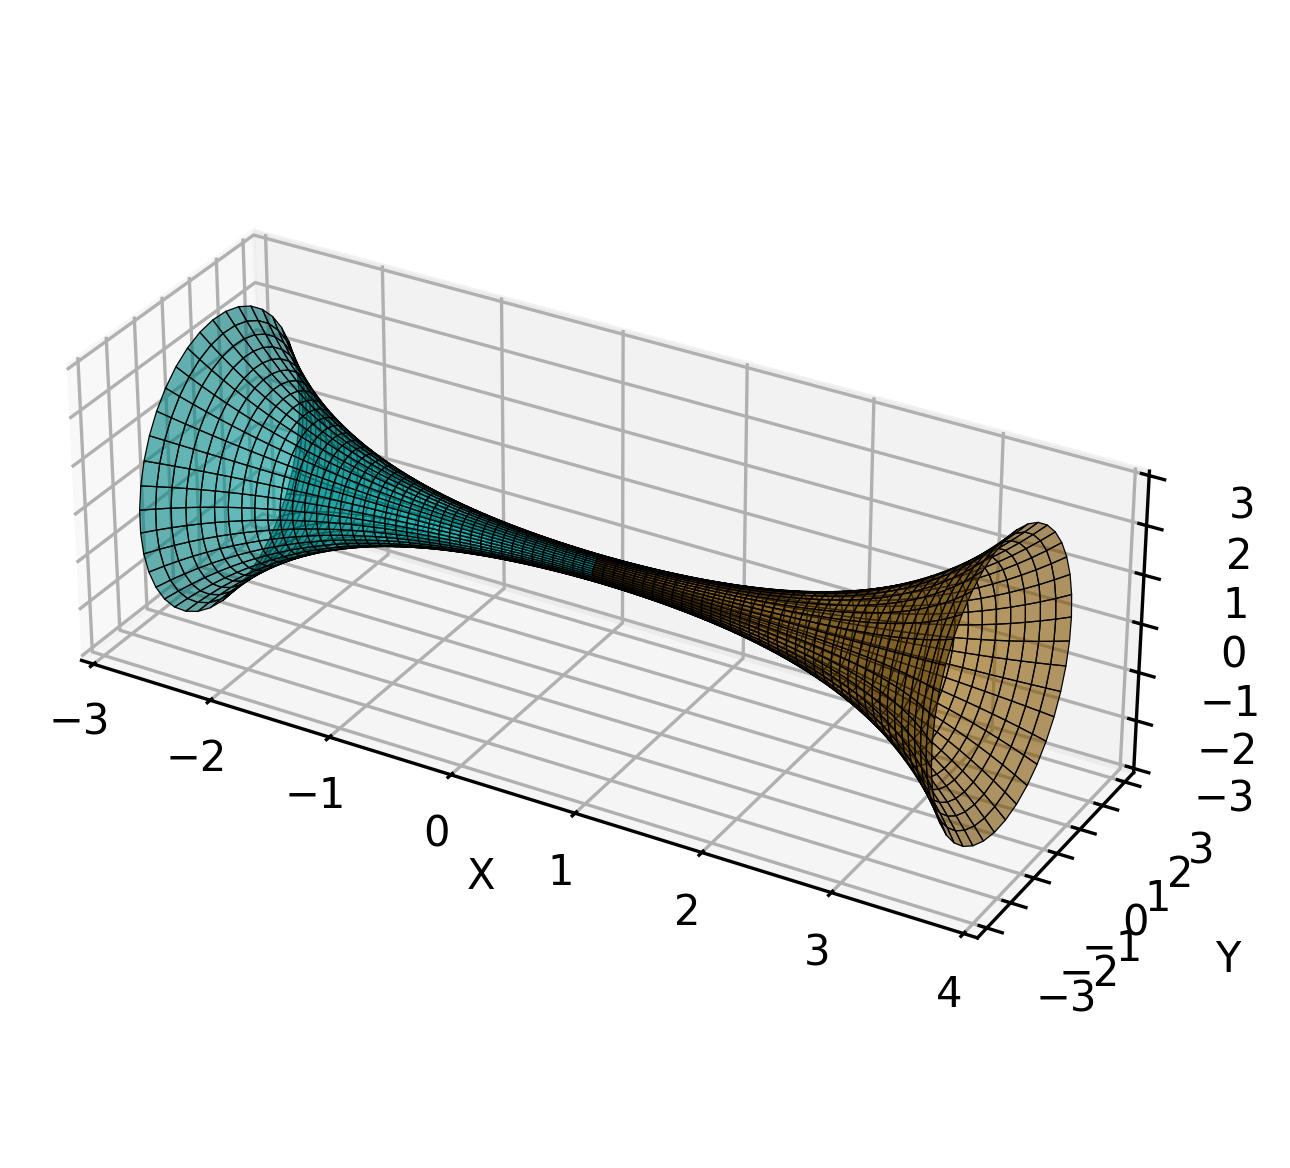

In [118]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((6, 2, 2))
ax.plot_surface(u1, v, w, color='orange', edgecolor='k', alpha=0.6, linewidth=0.3)
ax.plot_surface(u2, v, w, color='cyan', edgecolor='k', alpha=0.6, linewidth=0.3)
# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('3D Parametric Surface: Sphere')
# Show the plot
plt.show()